<a href="https://colab.research.google.com/github/MowahhidShakeel/BasicCalculator/blob/main/Dog_Cat_Classifier_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [109]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_do

In [110]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories
train_dir = 'cats_and_dogs/train'
validation_dir = 'cats_and_dogs/validation'
test_dir = 'cats_and_dogs/test'

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 150, 150  # You can adjust this if you'd like, but these dimensions work fairly well for this dataset

# Create ImageDataGenerators
train_image_generator = ImageDataGenerator(rescale=1./255)  # Scales the image data to [0,1]
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Setup generators to read images from directories
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,   # You can adjust the batch size if you'd like
    class_mode='binary'
)

validation_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,   # Consistent batch size with training
    class_mode='binary'
)

# Note for the test set:
# We don't know the true labels, so we use class_mode=None and we do not shuffle
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,   # Consistent batch size with training and validation
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


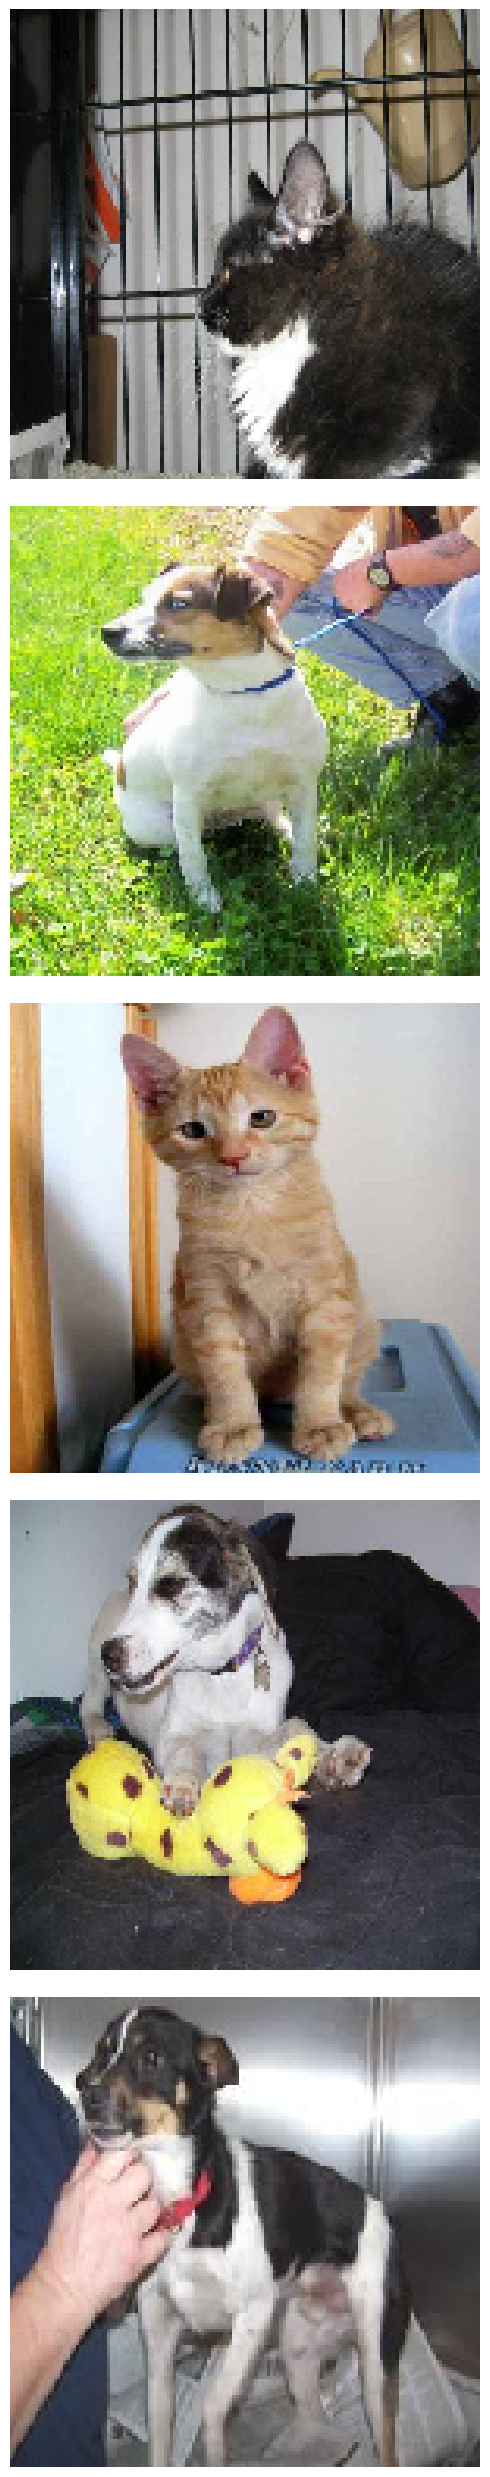

In [111]:
import matplotlib.pyplot as plt

# Function to plot images
def plotImages(images_arr, probabilities = []):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,5*len(images_arr)))
    if len(probabilities) == 0:
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis('off')
    else:
        for img, probability, ax in zip(images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis('off')
            if probability > 0.5:
                ax.set_title("%.2f" % (probability*100) + "% dog")
            else:
                ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.tight_layout()
    plt.show()

# Extract a batch of images from the training generator and plot 5 of them
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])



In [112]:
# Augmented ImageDataGenerator for training data
train_image_generator = ImageDataGenerator(
    rescale=1./255,               # Rescale the image data to [0,1]
    rotation_range=40,            # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,       # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,      # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,             # Randomly apply shearing transformations
    zoom_range=0.2,              # Randomly zoom inside pictures
    horizontal_flip=True,        # Randomly flip half of the images horizontally
    fill_mode='nearest'          # Fill in newly created pixels, which can appear after a rotation or a width/height shift
)

# Re-setup generator to read images from the training directory
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


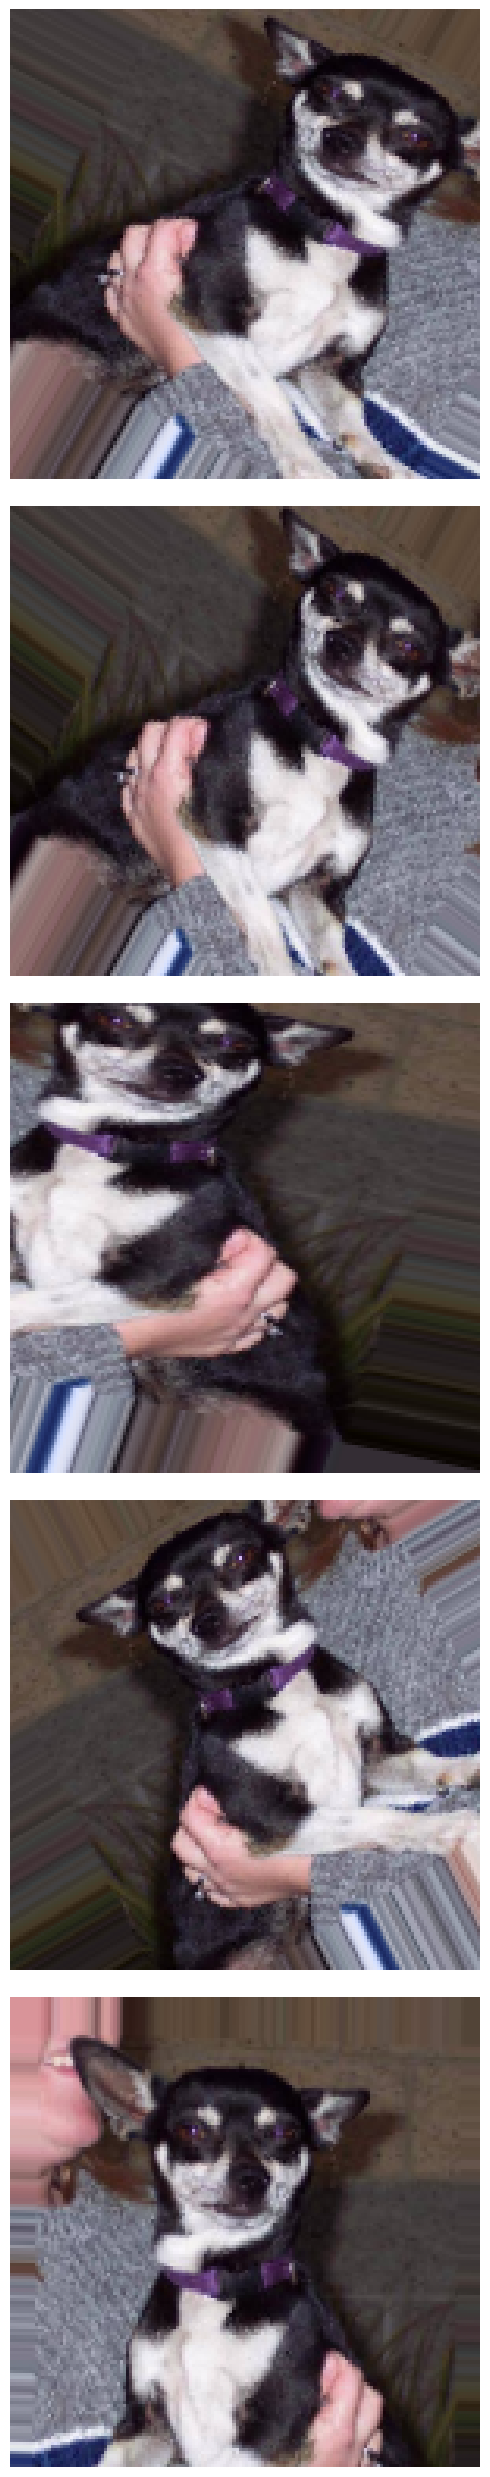

In [113]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential()

# Add a stack of Conv2D and MaxPooling2D layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))  # First layer needs input shape
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the tensors and add a fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))

# The final layer with a sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display a summary of the model's architecture
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 128)      

In [115]:
# Train the model
history = model.fit(
    x=train_data_gen,
    steps_per_epoch=15,   # 2000 images = batch_size * steps_per_epoch
    epochs=15,            # You can adjust this based on the model's performance
    validation_data=validation_data_gen,
    validation_steps=32   # 1000 images = batch_size * validation_steps
)



Epoch 1/15
15/15 [==============================] - 126s 8s/step - loss: 0.7252 - accuracy: 0.5037 - val_loss: 0.6919 - val_accuracy: 0.5090
Epoch 2/15
15/15 [==============================] - 123s 8s/step - loss: 0.6939 - accuracy: 0.4957 - val_loss: 0.6922 - val_accuracy: 0.5030
Epoch 3/15
15/15 [==============================] - 123s 8s/step - loss: 0.6910 - accuracy: 0.5321 - val_loss: 0.6833 - val_accuracy: 0.6120
Epoch 4/15
15/15 [==============================] - 132s 9s/step - loss: 0.6866 - accuracy: 0.5502 - val_loss: 0.6675 - val_accuracy: 0.6040
Epoch 5/15
15/15 [==============================] - 123s 8s/step - loss: 0.6769 - accuracy: 0.5849 - val_loss: 0.6629 - val_accuracy: 0.5750
Epoch 6/15
15/15 [==============================] - 118s 8s/step - loss: 0.6725 - accuracy: 0.5946 - val_loss: 0.6660 - val_accuracy: 0.5440
Epoch 7/15
15/15 [==============================] - 125s 8s/step - loss: 0.6679 - accuracy: 0.5887 - val_loss: 0.6388 - val_accuracy: 0.6540
Epoch 8/15
15

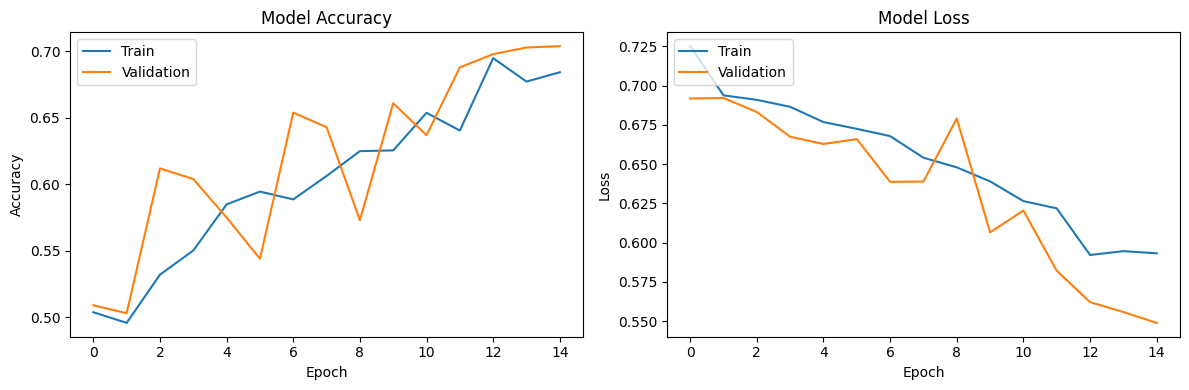

In [116]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


2/2 [==============================] - 1s 220ms/step


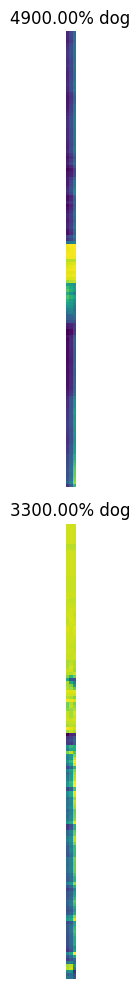

[0.49731335 0.33136204 0.11495028 0.8002804  0.4592525  0.5488736
 0.5080601  0.21152867 0.5394598  0.9112653  0.32781976 0.52574897
 0.62487733 0.300282   0.57713157 0.79835844 0.76480246 0.92932665
 0.5432087  0.6814092  0.2493601  0.5293373  0.40449348 0.50724703
 0.3204589  0.28705722 0.92813647 0.4958178  0.19753768 0.6127599
 0.34327713 0.16290331 0.79863805 0.99971884 0.27781948 0.66079974
 0.9865877  0.7960861  0.30064926 0.459045   0.48352942 0.36000913
 0.90397054 0.81022805 0.5212514  0.62716126 0.47948945 0.2694571
 0.5230263  0.28419453]


In [117]:
# Get model predictions for test images
probabilities = model.predict(test_data_gen)

# Flatten the probabilities to 1D
probabilities = probabilities.flatten()

# Convert probabilities to percentages
percentages = (probabilities * 100).astype(int)

# Since test_data_gen has no labels, we directly retrieve the images
test_images = [test_data_gen[i][0][0] for i in range(len(test_data_gen))]

# Plot the test images with their corresponding predicted probabilities
plotImages(test_images, percentages)

print(probabilities)



In [118]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
